In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
## Define a dataset
mean_01=np.array([1.0,0.5])
cov_01=np.array([[1.0,0.1],[0.1,1.2]])

mean_02=np.array([5.3,6.5])
cov_02=np.array([[1.0,0.1],[0.1,1.2]])

dist_01=np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02=np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape,dist_02.shape

(500L, 2L) (500L, 2L)


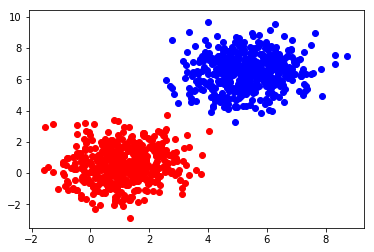

In [95]:
plt.scatter(dist_01[:,0], dist_01[:,1],color='red')
plt.scatter(dist_02[:,0], dist_02[:,1],color='blue')
plt.show()

In [96]:
#Input data :- (dist_01.shape[0]+dist_02.shape[0], #num features)
data=np.concatenate((dist_01,dist_02))
print data.shape

print data.min(), data.max()

(1000L, 2L)
-2.8523549927511613 9.686276179934708


In [97]:
temp=np.vstack((dist_01,dist_02))
print temp.shape

random_temp=np.hstack((dist_01,dist_02))
print random_temp.shape

## much more functionalities..

(1000L, 2L)
(500L, 4L)


In [98]:
## Try taking mean values with large magnitudes like 10000,0.5 etc. so then need
## feature scaling for it : normalize dataset : simply devide my maximum value.. decently scaling is done then..

In [99]:
## KMeans Clustering -> Parameter definition..
K=4 # Number of clusters
clusters ={}
for cx in range(K):
    params= {
        'centroid': np.random.uniform(data.min(),data.max(),(data.shape[1],)),
        'history':[], # history of cluster locations
        'points':[], # points in the cluster -> for centroid recalculations..
    }
    clusters[cx]=params

colors=['yellow','red','cyan','green']

In [100]:
#Defining a distance function
def distance(p1,p2):
    '''Euclidian Distance'''
    return np.sqrt(((p1-p2)**2).sum())

distance(np.array([0.0,0.0]),np.array([1.0,1.0]))

1.4142135623730951

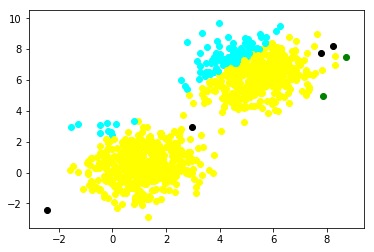

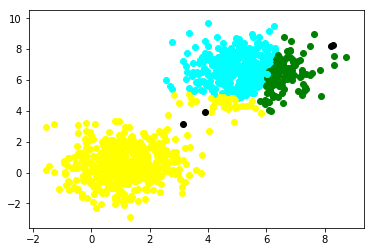

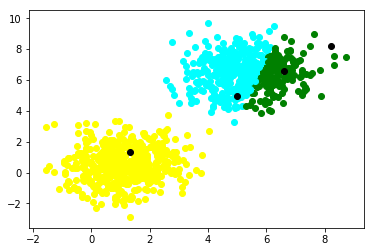

In [101]:
## Execution logic
n_steps=3
for ix in range(n_steps):    
    plt.figure(0)
    #Step 1. -> Assign points to clusters
    for ix in range(data.shape[0]):
        d=[]
        for cx in range(K):
            dist=distance(data[ix],clusters[cx]['centroid'])
            d.append(dist)

        d=np.asarray(d)
        c_id=np.argmin(d) ## Cluster id for particular point

        plt.scatter(data[ix,0],data[ix,1],color=colors[c_id])

        clusters[c_id]['points'].append(data[ix])

    for cx in range(K):
        plt.scatter(clusters[cx]['centroid'][0],clusters[cx]['centroid'][0],color='black')

    # Step 2. Update the centroid
    for cx in range(K):
        clusters[cx]['history'].append(clusters[cx]['centroid'])

        if len(clusters[cx]['points'])!=0:
            new_val=np.array(clusters[cx]['points']).mean(axis=0)
            clusters[cx]['centroid']=new_val #updating centroid location

        # Step 3. Remove points from the cluster
        clusters[cx]['points']=[]

    plt.show()

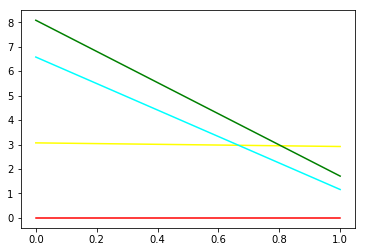

In [102]:
plt.figure(0)
for cx in range(K):
    hist_d=[]
    for pt in range(1,len(clusters[cx]['history'])):
        hist_d.append(distance(clusters[cx]['history'][pt],clusters[cx]['history'][pt-1]))
    plt.plot(hist_d,color=colors[cx])
plt.show()

In [32]:
## explanation for : how mean works?? 
test_matrix=np.ones((10,2))
test_matrix[:,0]=0.0
print test_matrix.mean()
print test_matrix.mean(axis=0)
print test_matrix.mean(axis=1)

0.5
[0. 1.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [27]:
np.random.uniform?

In [25]:
print np.zeros((2,)) ## Row vector
print "---"
print np.zeros((2,1))

[0. 0.]
---
[[0.]
 [0.]]
